# Case Study -- Barcelona-data-sets

This is a notebook for studying Barcelona. The Barcelona data set is collected around the population and environment of the city. It includes a lot of ordinary data, such as births, deaths, etc. There are also some special data such as accidents. This is a case study that analyzes data and makes predictions based on some data.
We will build an ID3 decision tree in the second half of the notebook to obtain entropy and info gain for a certain data.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
eps = np.finfo(float).eps
from numpy import log2 as log

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from sys import version_info
if version_info.major != 3:
    raise Exception

In [ ]:
bus_stops = pd.read_csv('/kaggle/input/barcelona-data-sets/bus_stops.csv')

display(bus_stops.head(n=10))

In [ ]:
bus_stops.info()

Check for missing values, a total of 3162 data, most of them have no abnormal missing values

In [ ]:
bus_stops.describe()

The above results give some statistical values that the eigenvalues are numerical values, including mean, standard deviation, median, minimum, maximum, 25% quantile, and 75% quantile. These statistical results are simple and straightforward, and are very useful for initial understanding of the quality of a feature. For example, we observed that the maximum value of the Longitude feature is 2.221753 and the minimum value is 2.055835. Because it is a fixed flight, there will inevitably be errors, but they are all within a reasonable range.

In [ ]:
df = bus_stops.copy()


columns = ['Code','Transport','Longitude','Latitude','Bus.Stop','District.Name','Neighborhood.Name']
df = pd.DataFrame(df)


display(df.head(n=5))

In [ ]:
print(f"Totally, there are {len(bus_stops)} records")

bus_stops.head()

In [ ]:
for k in bus_stops.keys():
    print(k)
# State
# County

# Entropy of the vote distributions

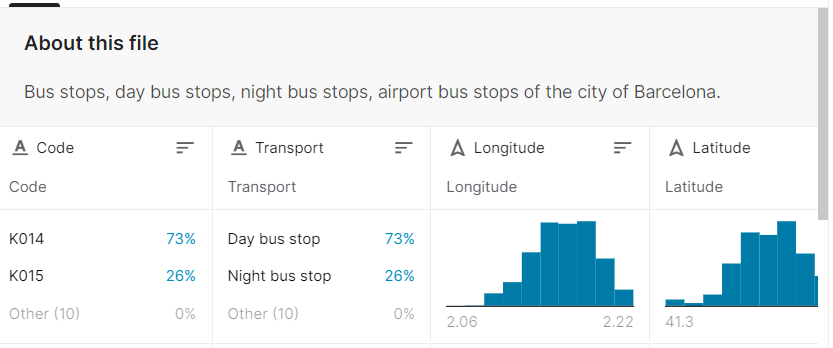!

The picture shows that K014 accounted for 73% and K015 accounted for 26%. Except for these two attributes, the other attributes accounted for too small a proportion. Therefore, a data containing 50 sets of data was created. The default K014 accounted for 74%, and K015 Accounted for 26%, and renamed K014 to K0141, so that the attribute can be clearly distinguished from K015. And convert the latitude and longitude values to integers.In addition, a new attribute GoodJourney is added, which contains two attributes of yes and no, which represents The quality of the journey, the following is the distribution of each attribute in each category:

**Code**:"K0141","K015"(74%,26%) 

**Transport**:"Day","Night"(74%,26%) 

**Longitude**：“214”，“216”，“222”(30%.40%,30%) 

**Latitude**："413"，“414”，“415”(40%,20%,40%) 

**GoodJourney**：“yes","no"（80%，10%) 

In the newly established simulation model, it should be noted that Code and Transport are divided into two attributes that have no fixed relationship. Although their proportions are still similar, they are only the original data analyzed in the previous data analysis, and the later ID3, The decision tree and the evaluation of entropy are all performed on the basis of the simulated data set. The proportion of each attribute of the simulated data group is different from the original data group, especially the two attributes of latitude and longitude, which are newly established.


In [ ]:
df.describe()

In [ ]:
Transport = 'Day,Day,Night,Day,Night,Night,Day,Day,Day,Day,Night,Day,Day,Day,Night,Day,Day,Day,Day,Night,Day,Day,Day,Night,Night,Day,Day,Day,Night,Day,Day,Day,Day,Day,Night,Night,Day,Day,Day,Day,Night,Day,Day,Day,Day,Night,Day,Day,Day,Day'.split(',')
longitude = '214,214,216,214,214,222,216,214,222,214,222,214,222,216,216,214,216,222,214,222,222,214,214,214,222,216,222,216,222,216,216,222,214,216,222,216,222,214,216,216,216,222,216,214,222,216,216,216,216,216'.split(',')
latitude = '414,413,415,413,415,413,413,413,413,414,415,413,413,414,415,414,413,415,413,415,414,413,413,413,415,415,413,415,413,413,413,413,414,415,413,415,413,414,415,414,414,415,414,415,415,415,415,415,415,415'.split(',')
Code = 'K0141,K015,K0141,K0141,K0141,K015,K0141K015,K015,K0141,K0141,K0141,K015,K0141,K0141,K0141,K0141,K0141,K015,K015,K0141,K0141,K0141,K015,K0141,K0141,K0141,K0141,K0141,K015,K015,K0141,K0141,K0141,K0141,K015,K0141,K015,K0141,K0141,K0141,K015,K0141,K0141,K0141,K0141,K0141,K0141,K0141,K0141,'.split(',')
GoodJourney = 'yes,yes,yes,yes,no,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,yes,no,yes,yes,yes,no,yes,yes,yes,yes,no,yes,yes,yes,no,yes,no,no,yes,yes,yes,yes,yes'.split(',')

In [ ]:
dataset ={'Transport':Transport,'longitude':longitude,'latitude':latitude,'Code':Code,'GoodJourney':GoodJourney}
df = pd.DataFrame(dataset,columns=['Transport','longitude','latitude','Code','GoodJourney'])

# **For every attribute/feature:**
1.calculate entropy for all categorical values           
2.take average information entropy for the current attribute         
3.calculate gain for the current attribute

# Find the Entropy and then Information Gain for splitting the data set.
# Entropy=-Σ(i=1 to n)Pi*log2(Pi)
We’ll define a function that takes in class (target variable vector) and finds the entropy of that class. Here the fraction is ‘pi’, it is the proportion of a number of elements in that split group to the number of elements in the group before splitting(parent group).

In [ ]:
##1. claculate entropy o the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.GoodJourney.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.GoodJourney.value_counts()[value]/len(df.GoodJourney)  
    entropy_node += -fraction*np.log2(fraction)

In [ ]:
print(entropy_node) #Still get the same value as the above

Here we use the entropy computation function we built from the last time to measure the information in the GoodJourney attribute of the data.

# Now define a function {ent} to calculate entropy of each attribute :

In [ ]:

def ent(df,attribute):
    target_variables = df.GoodJourney.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute 


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.GoodJourney ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This 
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy 

    return(abs(entropy_attribute))

In [ ]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]} #store entropy of each attribute with its name
a_entropy

# Calculate Info gain of each attribute :
define a function to calculate IG (infogain) : IG(attr) = entropy of dataset - entropy of attribute

In [ ]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

Store IG(Info Gain) of each attributes in a dictionary :

In [ ]:
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}

In [ ]:
print(IG)

In [ ]:
def cal_entropy(y):
    """Information entropy calculation
    
     parameter 
     y: category number type: narray, shape: {n_samples}
    
     return
     e: Information entropy type: float
    """
    count = np.array(pd.Series(y).value_counts())
    p = count/count.sum()
    return -np.sum(np.log2(p)*p)

In [ ]:
def choose_features_ID3(X, y):
    """Select feature (single)
    parameter
    X: features, type: ndarray, shape: {n_samples, n_features}
    y: category number type: narray, shape: {n_samples}
    return
    min_fea_index: selected feature, type: integer
    entropy: information gain, type: float
    """
    n_samples, n_features = X.shape
    
    fea_index = 0
    max_entropy = 0
    pre_y_entropy = cal_entropy(y)
    for i in range(n_features):
        entropy_sum = 0
        row_value = X[:,i]
        for value in set(row_value):
            bools = row_value==value
            entropy_sum += np.sum(bools)/n_samples * cal_entropy(y[bools])
        entropy = pre_y_entropy-entropy_sum
        if entropy>max_entropy:
            max_entropy = entropy
            fea_index = i
    return fea_index,entropy

In [ ]:
def tree_ID3(X, y, X_name):
    """Establish decision tree, adopt ID3, no pruning operation
    parameter
    X: features, type: ndarray, shape: {n_samples, n_features}
    y: category number, type: ndarray, shape: {n_samples} 
    X_name: feature name, type: ndarray, shape: {n_samples}
    """
    if not len(X):return 
    if cal_entropy(y)==0:return y[0]
    
    n_samples, n_features = X.shape
    index = choose_features_ID3(X, y)[0]
    dic = {X_name[index]:{}}
    remove_fea = X[:, index]
    for fea in set(remove_fea):
        row_bool = remove_fea==fea  # Row index
        col_bool = np.arange(n_features)!=index   # Row index
        dic[X_name[index]][fea] = tree_ID3(X[row_bool][:,col_bool], y[row_bool], X_name[col_bool])
    return dic

In [ ]:
dataSet = np.array([
        
        ['Green','Curled up','Turbid sound','Clear','Depressed','Hard and slippery','Good melon'],
        ['Black','Curled up','Dull','Clear','Depressed','Hard and slippery','Good melon'],
        ['Black','Curled up','Turbid sound','Clear','Depressed','Hard and slippery','Good melon'],
        ['Green','Curled up','Dull','Clear','Depressed','Hard and slippery','Good melon'],
        ['Light white','Curled up','Turbid sound','Clear','Depressed','Hard and slippery','Good melon'],
        ['Green','Slightly curled up','Turbid sound','Clear','Slightly concave','Soft sticky','Good melon'],
        ['Black','Slightly curled up','Turbid sound','Slightly muddy','Slightly concave','Soft sticky','Good melon'],
        ['Black','Slightly curled up','Turbid sound','Clear','Slightly concave','Hard and slippery','Good melon'],
        ['Black','Slightly curled up','Dull','Slightly muddy','Slightly concave','Hard and slippery','Bad melon'],
        ['Green','Stiff','Crispy','Clear','Flat','Soft sticky','Bad melon'],
        ['Light white','Stiff','Crisp','Fuzzy','Flat','Hard and slippery','Bad melon'],
        ['Light white','Curled up','Turbid sound','Fuzzy','Flat','Soft sticky','Bad melon'],
        ['Green','Slightly curled up','Turbid sound','Slightly muddy','Depressed','Hard and slippery','Bad melon'], 
        ['Light white','Slightly curled up','Dull','Slightly muddy','Depressed','Hard and slippery','Bad melon'],
        ['Black','Slightly curled up','Turbid sound','Clear','Slightly concave','Soft sticky','Bad melon'],
        ['Light white','Curled up','Turbid sound','Fuzzy','Flat','Hard and slippery','Bad melon'],
        ['Green','Curled up','Dull','Slightly muddy','Slightly concave','Hard and slippery','Bad melon']
    ])
X = dataSet[:,:-1]
y = dataSet[:,-1]
X_name = np.array(['color','root','knock','texture','umbilical','touch'])
tree_ID3(X,y,X_name)

In [ ]:

class Tree_ID3:
    def __init__(self):
        pass
        
    def cal_entropy(self, y):
        count = np.array(pd.Series(y).value_counts())
        # Probability of each category
        p = count/count.sum()
        # Information Entropy
        return -np.sum(np.log2(p)*p)

    def choose_features_ID3(self, X, y):
        n_samples, n_features = X.shape

        # Optimal feature index
        fea_index = 0
        # Maximum information gain
        max_entropy = 0
        # Information entropy of label y before classification
        pre_y_entropy = self.cal_entropy(y)
        
        for i in range(n_features):
            # Initialize the weighted information entropy after classification
            entropy_sum = 0
            row_value = X[:,i]
            for value in set(row_value):
                # Selected sample index
                bools = row_value==value
                entropy_sum += np.sum(bools)/n_samples * self.cal_entropy(y[bools])
            # Current information gain
            entropy = pre_y_entropy-entropy_sum
            if entropy>max_entropy:
                max_entropy = entropy
                fea_index = i
        return fea_index,entropy

    def tree_ID3(self, X, y, X_name):
        if not len(X):return
        # Only one category left, return
        if self.cal_entropy(y)==0:return y[0]

        n_samples, n_features = X.shape
        index = self.choose_features_ID3(X, y)[0]
        # Decision tree construction
        dic = {X_name[index]:{}}
        remove_fea = X[:, index]
        for fea in set(remove_fea):
            # Remaining row index
            row_bool = remove_fea==fea
            # Remaining column index
            col_bool = np.arange(n_features)!=index
            # Recursion
            dic[X_name[index]][fea] = self.tree_ID3(X[row_bool][:,col_bool], y[row_bool], X_name[col_bool])
        return dic
    
    def check(self, tree, X, X_name):
        """prediction
        """
        if not len(tree) or not len(X):return
        cur_fea_name = list(tree.keys())[0]
        cur_fea_index = np.where(X_name==cur_fea_name)[0][0]
        if X[cur_fea_index] not in tree[cur_fea_name].keys():return
        if tree[cur_fea_name][X[cur_fea_index]] in self.y_name:
            return tree[cur_fea_name][X[cur_fea_index]]
        else:
            bools = np.arange(len(X))!=cur_fea_index
            return self.check(tree[cur_fea_name][X[cur_fea_index]], X[bools], X_name[bools])
    
    def fit(self, X, y, X_name):
        self.X_name = X_name
        self.y_name = list(set(y))
        self.tree = self.tree_ID3(X, y, X_name)
        
    def predict(self, X):
        res = []
        for i in range(len(X)):
            res.append(self.check(self.tree, X[i], self.X_name))
        return np.array(res)

In [ ]:
clf = Tree_ID3()
clf.fit(X, y, X_name)
predict_y = clf.predict(X)
sum(predict_y==y)==len(y)

In [ ]:

dataSet = np.array([
['K0141','Day','214','414','yes'],                       
['K015','Day','214','413','yes'],
['K0141','Night','216','415','yes'],
['K0141','Day','214','413','yes'],
['K0141','Night','214','415','no'],
['K015','Night','222','413','yes'],
['K0141','Day','216','413','yes'],
['K015','Day','214','413','yes'],
['K015','Day','222','413','yes'],
['K0141','Day','214','414','yes'],    
['K0141','Night','222','415','no'],
['K0141','Day','214','413','no'],
['K015','Day','222','413','yes'],
['K0141','Day','216','414','yes'],
['K0141','Night','216','415','yes'],
['K0141','Day','214','414','yes'],
['K0141','Day','216','413','yes'],
['K0141','Day','222','415','yes'],
['K015','Day','214','413','yes'],
['K015','Night','222','415','yes'],    
['K0141','Day','222','414','yes'],
['K0141','Day','214','413','yes'],
['K0141','Day','214','413','yes'],
['K015','Night','214','413','yes'],
['K0141','Night','222','414','yes'],
['K0141','Day','216','415','yes'],
['K0141','Day','222','413','no'],
['K0141','Day','216','415','yes'],
['K0141','Night','222','413','no'],
['K015','Day','216','413','yes'],   
['K015','Day','216','413','yes'],
['K0141','Day','222','413','yes'],
['K0141','Day','214','414','no'],
['K0141','Day','216','415','yes'],
['K0141','Night','222','413','yes'],
['K015','Night','216','415','yes'],
['K0141','Day','222','413','yes'],
['K015','Day','214','414','no'],
['K0141','Day','216','415','yes'],
['K0141','Day','216','414','yes'],
['K0141','Night','216','414','yes'],
['K015','Day','222','415','no'],
['K0141','Day','216','414','yes'],
['K0141','Day','214','415','no'],
['K0141','Day','222','415','no'],
['K0141','Night','216','415','yes'],
['K0141','Day','216','415','yes'],
['K0141','Day','216','415','yes'],
['K0141','Day','216','415','yes'],
['K0141','Day','216','415','yes'],
     ])
X = dataSet[:,::-1]
y = dataSet[:,-1]
X_name = np.array(['Code','Transport','longitude','latitude','GoodJourney'])
tree_ID3(X,y,X_name)

In [ ]:
clf = Tree_ID3()
clf.fit(X, y, X_name)
predict_y = clf.predict(X)
sum(predict_y==y)==len(y)